# GRIP : The Spank Foundation - December 2022

# Task 1 : Prediction using supervised ML

# Author : Apoorv Varkute

# Predict Percentage scored by student based on the no. of study hours

In [5]:
# importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading data from remote link and printing content of it
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)   

print("Data imported successfully")
s_data.head(20)             

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


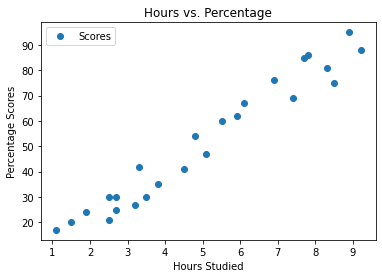

In [8]:
# Plotting the distributon graph of scores
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

# Preparing the data

In [9]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
x = s_data.iloc[:,:-1].values
y = s_data.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

# Training the algorithm

In [12]:
# Training the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


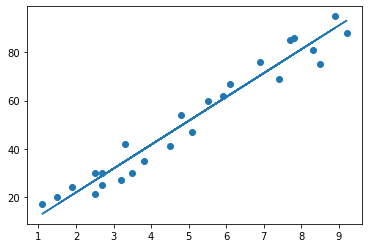

In [13]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_


plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Prediction

In [14]:
print(x_test)    # Testing data
y_pred = regressor.predict(x_test)   #Predict Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#Compare Actual vs. Predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# finding scores for 8 hours of study per day
s_data = np.array(9.25)
s_data = s_data.reshape(-1,1)
p = regressor.predict(s_data)
print("If student studied for 9.25 hours/day, then score is {}".format(p))

# h = np.array(hours)
# h = h.reshape(-1,1)
# scores = model.predict(h)
# print("Hours studied is",hours)
# print("Percentage scored is {}".format(scores[0]))

# hours = 9.25
# pred = regressor.predict(hours)
# print("No of Hours = {}".format(hours))
# print("Predicted Score = {}".format(pred[0]))

If student studied for 9.25 hours/day, then score is [93.69173249]


# Evaluating the model

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
